In [60]:
# Import All Libraries
import numpy
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [61]:
# Read File
data = read_csv('kc_house_data.csv')

In [62]:
# Print Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [63]:
# Print first 5 lines
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [64]:
# Extract Yr_Sold & mnth_sold from the date
data['Yr_Sold']=data.date.str.slice(0,4).astype(int)
data['mnth_Sold']=data.date.str.slice(4,6).astype(int)

In [65]:
data.shape

(21613, 23)

In [66]:
# describe the data
data.describe().T

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   
Yr_Sold        21613.0  2.014323e+03  4.676160e-01  2.014000e+03   
mnth_Sold      21613.0  6.574423e+00  3.115308e+00  1.000000e+00   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
Yr_Sold        2.014000e+03  2.014000e+03  2.015000e+03  2.015000e+03  
mnth_Sold      4.000000e+00  6.000000e+00  9.000000e+00  1.200000e+01

In [67]:
# Check for duplicates
data.duplicated().any()

False

In [68]:
# Drop Id and date columns
data=data.drop('id',axis=1)
data=data.drop('date',axis=1)

In [69]:
# Check for Null
data.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
Yr_Sold          False
mnth_Sold        False
dtype: bool

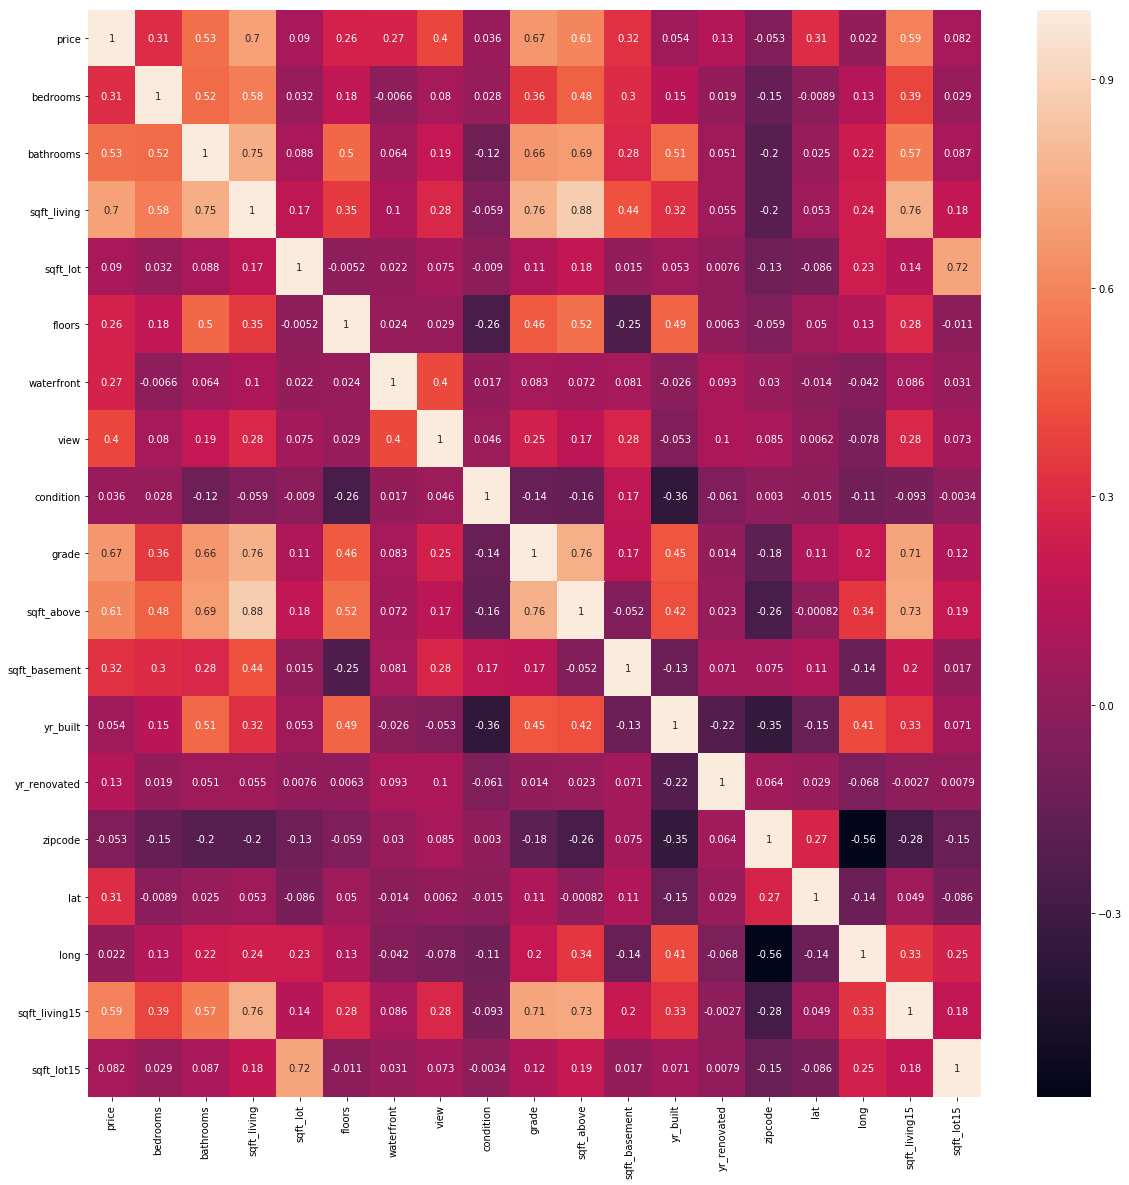

In [17]:
# Heat Map
corrmat = data.corr()
pyplot.subplots(figsize = (20,20))
sn.heatmap(corrmat, annot=True)

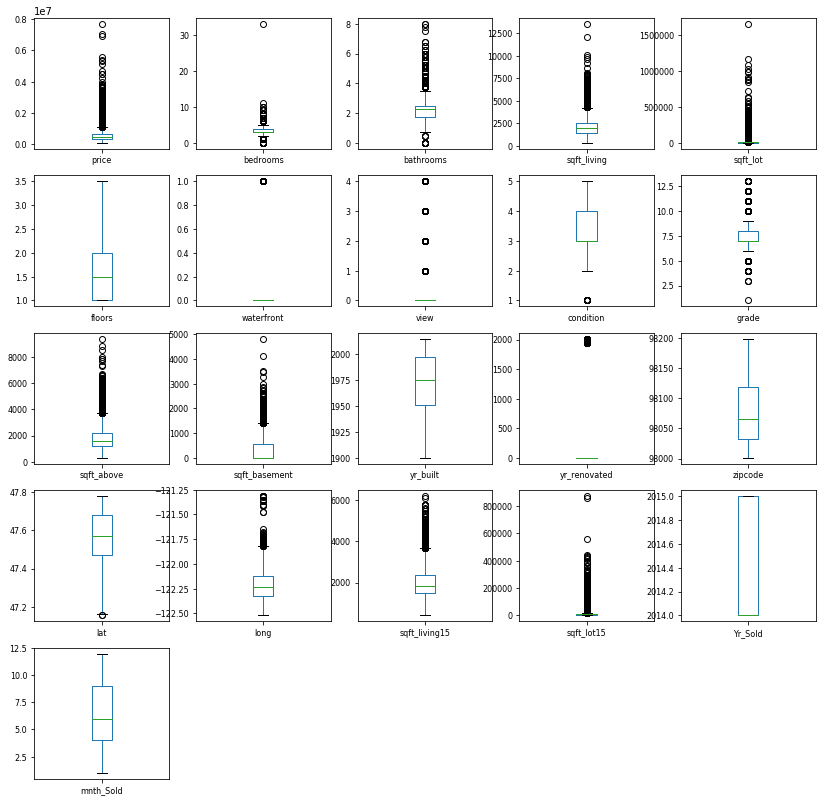

In [12]:
# Box plot
data.plot(kind='box', subplots=True, layout=(5,5), fontsize=8, figsize=(14,14))
pyplot.show()

In [70]:
#log transform price
data['lgprice']=numpy.log(data.price)

In [72]:
# remove Outliers checking from Boxplot
data['bedrooms'][data['bedrooms']>20]=20
data['sqft_living'][data['sqft_living']>11000]=11000
data['condition'][data['condition']<2]=2
data['sqft_lot15'][data['sqft_lot15']>6000]=6000

C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alekh\Anac

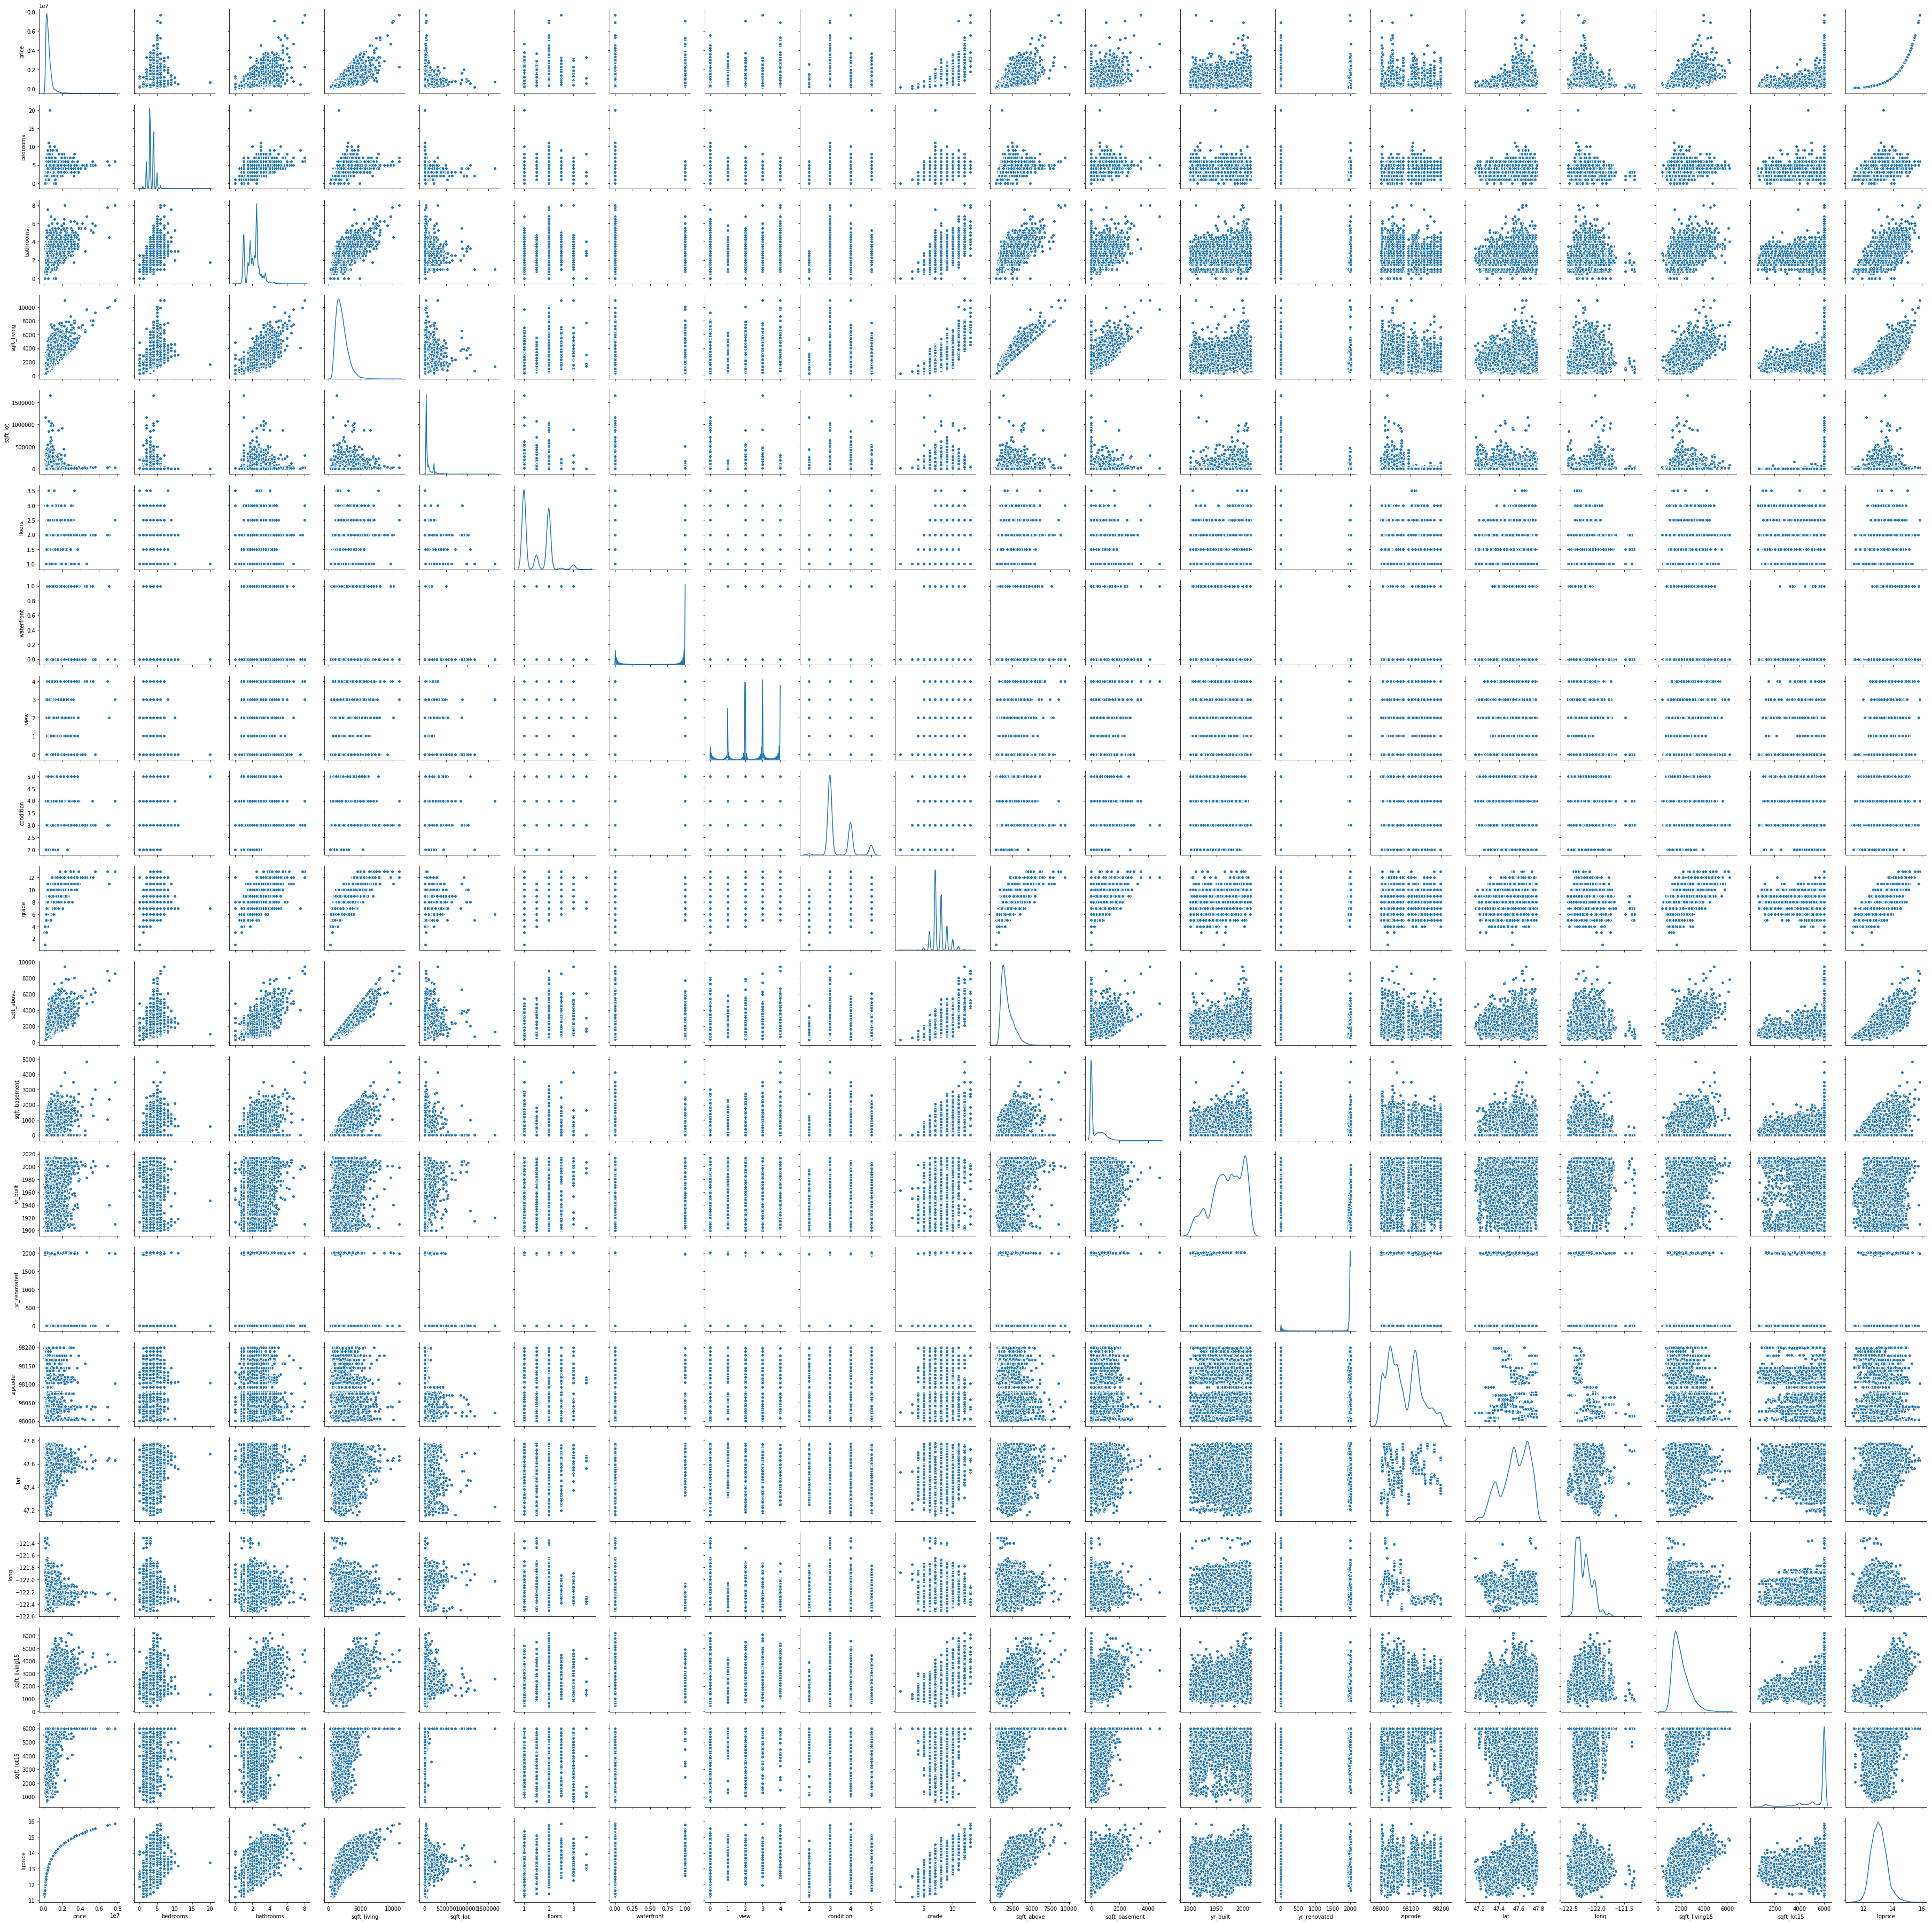

In [28]:
# Check for the distribution of Data
sn.pairplot(data, diag_kind='kde')

Price is highly co-related with soft living, grade and soft above
Price column is heavily right skewed (we are handling this by log transform)
As expected, Bedrooms, Bathrooms, Floors, Condition, Yr_built, zip code, lattitude, longitude  and Grade are a mixture of gaussians
Sqft Living, Sqft lot, sqft_above, soft basement and sqft_15 column are right skewed too (we are handling this by log transform)

In [73]:
# Log Transform for few variables to create normal distribution
data['sqft_living']=numpy.log(data.sqft_living)
data['sqft_lot']=numpy.log(data.sqft_lot)
data['sqft_above']=numpy.log(data.sqft_above)
#data['sqft_basement']=numpy.log(data.sqft_basement)
data['sqft_lot15']=numpy.log(data.sqft_lot15)


In [74]:
X=data.drop(['price','lgprice'],axis=1)
y=data['lgprice']

In [75]:
# create train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [77]:
# Building OLS without creating additional features
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
#Train Accuracy
round(model.score(X_train,y_train),3)

0.776

In [84]:
# Test Accuracy
round(model.score(X_test,y_test),3)

0.78

In [86]:
# Creating poly regression with degree 2 as degree 3 was out of memory and would have overfitted the model
from sklearn.preprocessing import PolynomialFeatures
Poly=PolynomialFeatures(degree=2)
X_train=Poly.fit_transform(X_train)
X_test=Poly.transform(X_test)

In [87]:
# there are 231 features post using Polynomial features
X_train.shape

(17290, 231)

In [89]:
# creating Dataframe to get header for train dataset
X_train=pd.DataFrame(X_train)
X_train.columns=Poly.get_feature_names(X.columns)
X_train=X_train.drop('1',axis=1)

In [90]:
# creating Dataframe to get header for test dataset
X_test=pd.DataFrame(X_test)
X_test.columns=Poly.get_feature_names(X.columns)
X_test=X_test.drop('1',axis=1)

In [91]:
# Building Ridge Regression
from sklearn.linear_model import Ridge 
rr=Ridge(alpha=0,fit_intercept=False)
rr.fit(X_train, y_train)

# getting the warning "Ill-conditioned matrix detected. Result is not guaranteed to be accurate."
# And because of the warning grid search to tune the hyperparameter alpha is not working 
# Have posted question in Olympus for this

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.295595e-39
  overwrite_a=True).T


Ridge(alpha=0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [94]:
# train Acc
round(rr.score(X_train, y_train),3)

0.837

In [95]:
# Test Acc
round(rr.score(X_test, y_test),3)

0.838

Both Train and Test accuracy are similar thus model will generalise well.

In [115]:
rr.intercept_

0.0

In [51]:
from sklearn.model_selection import GridSearchCV
params={'alpha':numpy.arange(0,20,1)}
grid_search=GridSearchCV(rr,params,cv=3,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.244972e-38
  overwrite_a=True).T
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.205340e-39
  overwrite_a=True).T
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.540643e-25
  overwrite_a=True).T
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.152655e-25
  overwrite_a=True).T
C:\Users

C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.085064e-24
  overwrite_a=True).T
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.430300e-24
  overwrite_a=True).T
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.735650e-24
  overwrite_a=True).T
C:\Users\Alekh\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.593791e-24
  overwrite_a=True).T
C:\Users

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Ridge(alpha=0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [52]:
grid_search.best_estimator_

Ridge(alpha=0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
# Feature Importance
# Though the results of feature importance won't be highly accurate as multicollineartity is untreated
# But calculating it for reference
coeff=pd.DataFrame(abs(rr.coef_))
coeff.columns=['coeff']
coeff['col']=pd.Series(X_train.columns)
coeff.sort_values(by='coeff',ascending=False)

coeff                          col
110  1.175228e+05                 waterfront^2
5    1.173615e+05                   waterfront
15   5.530132e+02                         long
2    4.125603e+02                  sqft_living
14   3.260632e+02                          lat
9    3.023980e+02                   sqft_above
18   1.311163e+02                      Yr_Sold
1    5.200803e+01                    bathrooms
17   4.901782e+01                   sqft_lot15
0    4.808394e+01                     bedrooms
4    4.110527e+01                       floors
19   3.839563e+01                    mnth_Sold
6    3.186280e+01                         view
8    2.555814e+01                        grade
7    2.120968e+01                    condition
3    1.066126e+01                     sqft_lot
209  4.706090e+00                        lat^2
13   2.177004e+00                      zipcode
210  1.982375e+00                     lat long
66   1.427012e+00       sqft_living sqft_above
120  1.332727e+00              waterfront long
59   1.117616e+00                sqft_living^2
119  8.820373e-01               waterfront lat
11   5.906889e-01                     yr_built
122  5.594903e-01        waterfront sqft_lot15
71   3.668284e-01              sqft_living lat
72   3.634494e-01             sqft_living long
169  3.472349e-01               sqft_above lat
88   2.884446e-01                 sqft_lot lat
10   2.405971e-01                sqft_basement
..            ...                          ...
187  1.421933e-05             yr_built zipcode
51   1.412538e-05       bathrooms yr_renovated
49   1.381833e-05      bathrooms sqft_basement
32   1.258202e-05        bedrooms yr_renovated
200  1.084613e-05         yr_renovated Yr_Sold
102  9.217055e-06          floors yr_renovated
216  8.985950e-06           long sqft_living15
36   6.906839e-06       bedrooms sqft_living15
131  5.069838e-06            view yr_renovated
67   3.310997e-06    sqft_living sqft_basement
222  3.282103e-06        sqft_living15 Yr_Sold
135  2.900639e-06           view sqft_living15
90   2.716023e-06       sqft_lot sqft_living15
223  1.934017e-06      sqft_living15 mnth_Sold
194  1.906426e-06               yr_renovated^2
202  1.871975e-06                    zipcode^2
190  1.298149e-06       yr_built sqft_living15
115  8.801564e-07     waterfront sqft_basement
156  8.395609e-07           grade yr_renovated
201  7.968954e-07       yr_renovated mnth_Sold
186  4.307189e-07        yr_built yr_renovated
195  3.361588e-07         yr_renovated zipcode
176  2.470110e-07       sqft_basement yr_built
181  5.285276e-08  sqft_basement sqft_living15
178  5.143206e-08        sqft_basement zipcode
205  4.476202e-08        zipcode sqft_living15
220  2.516635e-08              sqft_living15^2
198  1.717010e-08   yr_renovated sqft_living15
175  9.299934e-09              sqft_basement^2
177  3.204730e-09   sqft_basement yr_renovated

[230 rows x 2 columns]

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
vif_train=X_train.copy()

In [126]:
# There is High Multicollinearity and many features and thus it becomes difficult to remove one by one. And since Multicollinearity does'nt affect the accuracy but the feature importance I am not removing it.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_train.values, i) for i in range(vif_train.shape[1])]
vif["features"] = vif_train.columns

In [120]:
vif.sort_values(by='VIF Factor',ascending=False)

VIF Factor                    features
2    1.841609e+09                 sqft_living
9    1.643327e+09                  sqft_above
75   1.521154e+09         sqft_living Yr_Sold
173  1.393465e+09          sqft_above Yr_Sold
10   4.849605e+08               sqft_basement
19   4.636545e+08                   mnth_Sold
228  4.502375e+08           Yr_Sold mnth_Sold
183  4.429622e+08       sqft_basement Yr_Sold
5    2.502442e+08                  waterfront
110  2.501756e+08                waterfront^2
70   1.932264e+08         sqft_living zipcode
1    1.869464e+08                   bathrooms
8    1.837583e+08                       grade
168  1.681844e+08          sqft_above zipcode
57   1.674157e+08           bathrooms Yr_Sold
162  1.670886e+08               grade Yr_Sold
16   1.653999e+08               sqft_living15
4    1.576632e+08                      floors
222  1.450009e+08       sqft_living15 Yr_Sold
108  1.401555e+08              floors Yr_Sold
11   1.351173e+08                    yr_built
17   1.222693e+08                  sqft_lot15
3    1.173045e+08                    sqft_lot
192  1.166255e+08            yr_built Yr_Sold
15   1.154882e+08                        long
0    1.063448e+08                    bedrooms
13   1.058834e+08                     zipcode
225  1.038163e+08          sqft_lot15 Yr_Sold
92   9.973861e+07            sqft_lot Yr_Sold
207  9.757092e+07             zipcode Yr_Sold
..            ...                         ...
151  1.070403e+02         condition mnth_Sold
109  9.748519e+01            floors mnth_Sold
27   9.674885e+01          bedrooms condition
39   9.488780e+01          bedrooms mnth_Sold
111  6.754925e+01             waterfront view
126  5.760851e+01              view condition
144  5.457955e+01      condition yr_renovated
135  5.099751e+01          view sqft_living15
45   4.714810e+01              bathrooms view
112  4.650993e+01        waterfront condition
121  4.394027e+01    waterfront sqft_living15
26   3.990990e+01               bedrooms view
129  3.812987e+01          view sqft_basement
44   3.536468e+01        bathrooms waterfront
95   3.329632e+01           floors waterfront
96   3.237804e+01                 floors view
51   3.073538e+01      bathrooms yr_renovated
198  2.956846e+01  yr_renovated sqft_living15
102  2.724245e+01         floors yr_renovated
25   2.652269e+01         bedrooms waterfront
32   2.568993e+01       bedrooms yr_renovated
138  2.179215e+01              view mnth_Sold
115  2.025177e+01    waterfront sqft_basement
125  2.009383e+01                      view^2
177  1.913343e+01  sqft_basement yr_renovated
124  1.792793e+01        waterfront mnth_Sold
201  1.687847e+01      yr_renovated mnth_Sold
20   1.445723e+01                  bedrooms^2
131  3.523607e+00           view yr_renovated
117  3.178421e+00     waterfront yr_renovated

[230 rows x 2 columns]

To Check Feature importance the other method is through RF

In [112]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [113]:
model.score(X_train,y_train)

0.9846721946936199

In [114]:
model.score(X_test,y_test)

0.8901465560152688

Since there is huge difference between train and test accuracy that means there is Variance error. To reduce the variance n_estimators must be tuned. But Grid Search is costly here as there are many features and data is huge

In [109]:
# Getting Feature Importance
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.to_csv('feature.csv')

In [99]:
#coeff.to_csv('coeff.csv')

Finally I would choose the Ridge(rr) model with alpha =0 i.e. OLS as it generalise well and have decent accuracy(~84%) though there might be some bias error.